# 2021 Train 2022 H1 Val H2 Test Time Forecasting 

In [1]:
import os
import datetime
from random import seed
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras import layers
import keras

In [4]:
# Set Random Number Seed
keras.utils.set_random_seed(30)
tf.config.experimental.enable_op_determinism()

In [2]:
df = pd.read_csv("2021-2022 data.csv")
df

,Unnamed: 0,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,datetime
0,0,0.0,0.0,0.0,0.0,0.0,12.72,2021-01-01 00:00:00
1,1,0.0,0.0,0.0,0.0,0.0,12.71,2021-01-01 01:00:00
2,2,0.0,0.0,0.0,0.0,0.0,12.73,2021-01-01 02:00:00
3,3,0.0,0.0,0.0,0.0,0.0,12.70,2021-01-01 03:00:00
4,4,0.0,0.0,0.0,0.0,0.0,12.68,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...
17515,17515,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 19:00:00
17516,17516,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 20:00:00
17517,17517,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 21:00:00
17518,17518,0.0,0.0,0.0,0.0,0.0,12.09,2022-12-31 22:00:00


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)


In [4]:
n = len(df)
test = df[int(n*0.75):]
test_dates = test['datetime']
test_dates

13140   2022-07-02 12:00:00
13141   2022-07-02 13:00:00
13142   2022-07-02 14:00:00
13143   2022-07-02 15:00:00
13144   2022-07-02 16:00:00
                ...        
17515   2022-12-31 19:00:00
17516   2022-12-31 20:00:00
17517   2022-12-31 21:00:00
17518   2022-12-31 22:00:00
17519   2022-12-31 23:00:00
Name: datetime, Length: 4380, dtype: datetime64[ns]

In [5]:
df = df[['Waterlevel_Sto_Nino', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro']]
df

,Waterlevel_Sto_Nino,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro
0,12.72,0.0,0.0,0.0,0.0,0.0
1,12.71,0.0,0.0,0.0,0.0,0.0
2,12.73,0.0,0.0,0.0,0.0,0.0
3,12.70,0.0,0.0,0.0,0.0,0.0
4,12.68,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
17515,12.11,0.0,0.0,0.0,0.0,0.0
17516,12.11,0.0,0.0,0.0,0.0,0.0
17517,12.11,0.0,0.0,0.0,0.0,0.0
17518,12.09,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Waterlevel_Sto_Nino  17520 non-null  float64
 1   Rainfall_Aries       17520 non-null  float64
 2   Rainfall_Boso        17520 non-null  float64
 3   Rainfall_Campana     17520 non-null  float64
 4   Rainfall_Nangka      17520 non-null  float64
 5   Rainfall_Oro         17520 non-null  float64
dtypes: float64(6)
memory usage: 821.4 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Waterlevel_Sto_Nino,17520.0,12.054239,0.683808,10.18,11.47,12.08,12.38,18.5
Rainfall_Aries,17520.0,0.212500,1.654015,0.00,0.00,0.00,0.00,61.0
Rainfall_Boso,17520.0,0.228824,1.662582,0.00,0.00,0.00,0.00,60.0
Rainfall_Campana,17520.0,0.247374,1.718368,0.00,0.00,0.00,0.00,66.0
Rainfall_Nangka,17520.0,0.220719,1.791129,0.00,0.00,0.00,0.00,56.0
Rainfall_Oro,17520.0,0.261844,2.026179,0.00,0.00,0.00,0.00,73.0


In [8]:
n = len(df)
train_df = df[0:int(n*0.5)]
val_df = df[int(n*0.5):int(n*0.75)]
test_df = df[int(n*0.75):]

num_features = df.shape[1]
num_features

6

In [9]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    # properties to access them as tf datasets
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    def plot(self, model=None, plot_col='Waterlevel_Sto_Nino', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col}')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')


# Dense Neural Network (DNN)

In [10]:
wide_window = WindowGenerator(input_width = 6, label_width = 6, shift = 1, label_columns = ['Waterlevel_Sto_Nino'])
wide_window


Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [1 2 3 4 5 6]
Label column name(s): ['Waterlevel_Sto_Nino']

### Hyperparameter tuning for the number of units
1. Number of dense layers - 2 to 5
2. Number of units per layer - 16 to 128 (step = 16)
3. Type of activation function - relu or tanh or sigmoid

In [11]:
dnn_model_names = []
dnn_list_of_models = []

In [12]:
# Dense Neural Network
def dense_model(no_of_layers, no_of_units, acti):
    model_name = f'Dense_{no_of_layers}_{no_of_units}_{activation}'
    model = tf.keras.Sequential()
    for i in range(no_of_layers):
        model.add(layers.Dense(units = no_of_units, activation = acti))
    model.add(layers.Dense(units = 1))
    
    return model_name, model

for no_of_layers in range(2,6):
    for no_of_units in range(16,129,16):
        for activation in ['relu', 'tanh', 'sigmoid']:
            model_name, model = dense_model(no_of_layers, no_of_units, activation)
            dnn_model_names.append(model_name)
            dnn_list_of_models.append(model)

In [13]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError(), r_square, NSE])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [15]:
performance = {}

In [16]:
dense_val_performance = {}
dnn_history = {}
for count, model in enumerate(dnn_list_of_models):
    model_name = dnn_model_names[count]
    dnn_history[model_name] = compile_and_fit(model, wide_window)
    dense_val_performance[model_name] = model.evaluate(wide_window.val, return_dict = True)




Epoch 1/20
274/274 [==============================] - 2s 4ms/step - loss: 27.7081 - mean_squared_error: 27.7082 - r_square: 0.3289 - NSE: -137.4997 - val_loss: 0.1648 - val_mean_squared_error: 0.1648 - val_r_square: 0.6856 - val_NSE: 0.3306
Epoch 2/20
274/274 [==============================] - 1s 3ms/step - loss: 0.1559 - mean_squared_error: 0.1559 - r_square: 0.6780 - NSE: 0.2242 - val_loss: 0.0596 - val_mean_squared_error: 0.0596 - val_r_square: 0.8266 - val_NSE: 0.7428
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0671 - mean_squared_error: 0.0671 - r_square: 0.8206 - NSE: 0.7314 - val_loss: 0.0399 - val_mean_squared_error: 0.0399 - val_r_square: 0.8715 - val_NSE: 0.8325
Epoch 4/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0408 - mean_squared_error: 0.0408 - r_square: 0.8784 - NSE: 0.8381 - val_loss: 0.0313 - val_mean_squared_error: 0.0313 - val_r_square: 0.8947 - val_NSE: 0.8681
Epoch 5/20
274/274 [==============================]

In [17]:
dense_models = pd.DataFrame.from_dict(dense_val_performance)
dense_models = dense_models.transpose()
dense_models.sort_values(by = "loss")


,loss,mean_squared_error,r_square,NSE
Dense_2_48_relu,0.017354,0.017354,0.934133,0.928389
Dense_4_96_relu,0.018007,0.018007,0.935044,0.928071
Dense_4_128_relu,0.018101,0.018101,0.933648,0.929373
Dense_2_64_relu,0.018159,0.018159,0.936159,0.927347
Dense_5_64_relu,0.018400,0.018400,0.930041,0.925768
...,...,...,...,...
Dense_4_64_tanh,0.863662,0.863662,0.087167,-2.919342
Dense_4_48_tanh,0.865079,0.865079,0.093583,-3.142408
Dense_3_48_tanh,0.877317,0.877317,0.131970,-3.010976
Dense_4_80_tanh,0.895494,0.895495,0.111329,-3.054514


In [18]:
# We evaluate the best model according to least validation loss
# Constructing the best model
best_dnn_index = dnn_model_names.index("Dense_2_48_relu")
best_dnn_model = dnn_list_of_models[best_dnn_index]
performance['Dense'] = best_dnn_model.evaluate(wide_window.test, verbose = 0, return_dict = True)

In [19]:
performance

{'Dense': {'loss': 0.015424405224621296,
  'mean_squared_error': 0.01542440615594387,
  'r_square': 0.9664893746376038,
  'NSE': 0.964451014995575}}

In [20]:
# Test for Overfitting Dense - 2 hidden layers 128 neurons ReLU
dense_history = dnn_history["Dense_2_48_relu"].history


In [21]:
dense_history

{'loss': [6.467835903167725,
  0.030481381341814995,
  0.019527588039636612,
  0.017044685781002045,
  0.016200177371501923,
  0.015764586627483368,
  0.015543119981884956,
  0.015503881499171257,
  0.015407461673021317,
  0.015630099922418594,
  0.01701364852488041,
  0.015591190196573734,
  0.01723482459783554],
 'mean_squared_error': [6.467838287353516,
  0.03048139065504074,
  0.01952758990228176,
  0.017044687643647194,
  0.01620018668472767,
  0.015764588490128517,
  0.015543127432465553,
  0.015503876842558384,
  0.01540746632963419,
  0.015630090609192848,
  0.017013654112815857,
  0.015591184608638287,
  0.01723482459783554],
 'r_square': [0.6985679864883423,
  0.9057990908622742,
  0.9349198341369629,
  0.9477357268333435,
  0.947517454624176,
  0.949893057346344,
  0.9513488411903381,
  0.9520683288574219,
  0.9525706768035889,
  0.948356032371521,
  0.9424792528152466,
  0.9491546154022217,
  0.9460668563842773],
 'NSE': [-23.122135162353516,
  0.8913692235946655,
  0.92716

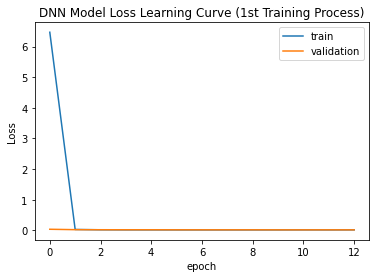

In [23]:
from matplotlib import pyplot as plt
plt.plot(dense_history['loss'])
plt.plot(dense_history['val_loss'])
plt.title('DNN Model Loss Learning Curve (1st Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [24]:
dense_history_2 = compile_and_fit(best_dnn_model, wide_window)

Epoch 1/20
274/274 [==============================] - 2s 3ms/step - loss: 0.0170 - mean_squared_error: 0.0170 - r_square: 0.9459 - NSE: 0.9360 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_r_square: 0.9370 - val_NSE: 0.9329
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - r_square: 0.9487 - NSE: 0.9417 - val_loss: 0.0201 - val_mean_squared_error: 0.0201 - val_r_square: 0.9243 - val_NSE: 0.9199
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0178 - mean_squared_error: 0.0178 - r_square: 0.9454 - NSE: 0.9329 - val_loss: 0.0274 - val_mean_squared_error: 0.0274 - val_r_square: 0.9132 - val_NSE: 0.8898


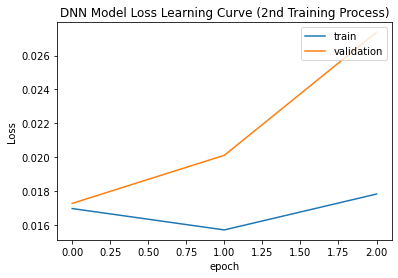

In [25]:
from matplotlib import pyplot as plt
plt.plot(dense_history_2.history['loss'])
plt.plot(dense_history_2.history['val_loss'])
plt.title('DNN Model Loss Learning Curve (2nd Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [26]:

dense_predictions = best_dnn_model.predict(test_df)
actual = test_df['Waterlevel_Sto_Nino']
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module



137/137 [==============================] - 0s 757us/step


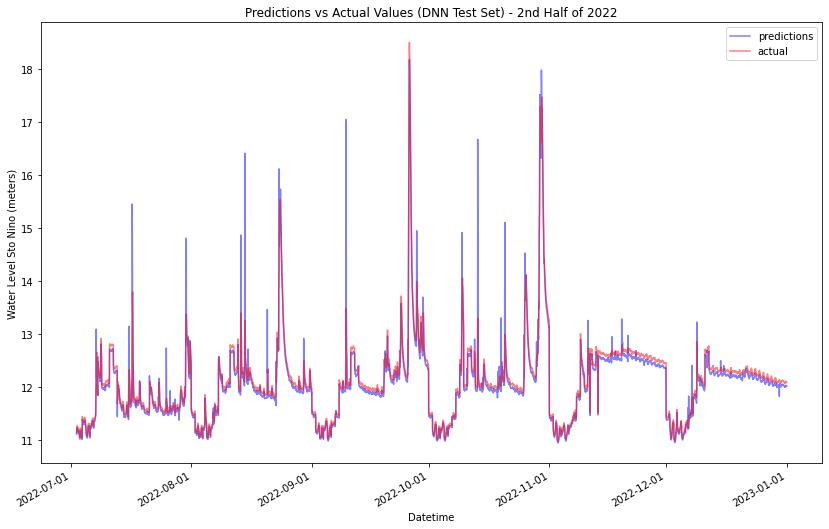

In [27]:
plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates, dense_predictions, c = "blue", label = "predictions", alpha = 0.5)
plt.plot(test_dates, actual, c = "red", label = "actual", alpha = 0.5)
plt.title('Predictions vs Actual Values (DNN Test Set) - 2nd Half of 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

In [28]:
print(actual.idxmax())
print(actual[15193])
max(dense_predictions)

15193
18.5


array([18.177011], dtype=float32)

In [29]:
cnn_model_names = []
cnn_list_of_models = []

In [30]:
# Convolution Neural Network (CNN)
CONV_WIDTH = 6

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Waterlevel_Sto_Nino'])

In [31]:
# Convolution Neural Network (CNN)
def cnn_model(no_of_layers, no_of_units, acti):
    model_name = f'CNN_{no_of_layers}_{no_of_units}_{activation}'
    model = tf.keras.Sequential()
    model.add(layers.Conv1D(filters = 64, kernel_size =(CONV_WIDTH,), activation = acti))
    for i in range(no_of_layers):
        model.add(layers.Dense(units = no_of_units, activation = acti))
    model.add(layers.Dense(units = 1))
    
    return model_name, model

for no_of_layers in range(2,6):
    for no_of_units in range(16,129,16):
        for activation in ['relu', 'tanh', 'sigmoid']:
            model_name, model = cnn_model(no_of_layers, no_of_units, activation)
            cnn_model_names.append(model_name)
            cnn_list_of_models.append(model)

In [33]:
cnn_val_performance = {}
cnn_history = {}
for count, model in enumerate(cnn_list_of_models):
    model_name = cnn_model_names[count]
    cnn_history[model_name] = compile_and_fit(model, conv_window)
    cnn_val_performance[model_name] = model.evaluate(conv_window.val, return_dict = True)
print(cnn_val_performance)


Epoch 1/20
274/274 [==============================] - 2s 3ms/step - loss: 4.0182 - mean_squared_error: 4.0182 - r_square: 0.6982 - NSE: -22.9164 - val_loss: 0.0806 - val_mean_squared_error: 0.0806 - val_r_square: 0.7794 - val_NSE: 0.6688
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - r_square: 0.8933 - NSE: 0.8338 - val_loss: 0.0674 - val_mean_squared_error: 0.0674 - val_r_square: 0.8159 - val_NSE: 0.7280
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0263 - mean_squared_error: 0.0263 - r_square: 0.9278 - NSE: 0.8994 - val_loss: 0.0602 - val_mean_squared_error: 0.0602 - val_r_square: 0.8349 - val_NSE: 0.7536
Epoch 4/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - r_square: 0.9373 - NSE: 0.9125 - val_loss: 0.0569 - val_mean_squared_error: 0.0569 - val_r_square: 0.8429 - val_NSE: 0.7714
Epoch 5/20
274/274 [==============================] - 

In [36]:
cnn_models = pd.DataFrame.from_dict(cnn_val_performance)
cnn_models = cnn_models.transpose()
cnn_models.sort_values(by = 'loss')

,loss,mean_squared_error,r_square,NSE
CNN_3_112_relu,0.039657,0.039657,0.875357,0.835219
CNN_3_48_relu,0.044554,0.044554,0.865289,0.826145
CNN_2_64_relu,0.047162,0.047162,0.856349,0.789639
CNN_4_112_relu,0.047526,0.047526,0.849909,0.807300
CNN_2_32_relu,0.047952,0.047952,0.863701,0.794034
...,...,...,...,...
CNN_5_64_tanh,0.876150,0.876150,0.083839,-3.180290
CNN_3_112_sigmoid,0.884061,0.884061,0.134303,-3.495464
CNN_2_128_tanh,0.893368,0.893368,0.287134,-3.311175
CNN_5_112_sigmoid,0.907373,0.907373,0.122114,-3.382541


In [37]:
# We get the best performing model that has the least validation loss
best_cnn_index = cnn_model_names.index('CNN_3_112_relu')
best_cnn_model = cnn_list_of_models[best_cnn_index]
performance['CNN'] = best_cnn_model.evaluate(conv_window.test, verbose = 0, return_dict = True)

In [39]:
# Test for Overfitting CNN - 3 hidden layers 112 neurons ReLU
conv_history = cnn_history["CNN_3_112_relu"].history
conv_history

{'loss': [4.793134689331055,
  0.037932708859443665,
  0.029625440016388893,
  0.024409404024481773,
  0.022404655814170837,
  0.025269579142332077,
  0.029054373502731323,
  0.02431422285735607,
  0.025456221774220467],
 'mean_squared_error': [4.793134689331055,
  0.037932708859443665,
  0.029625440016388893,
  0.024409404024481773,
  0.022404655814170837,
  0.025269579142332077,
  0.029054373502731323,
  0.02431422285735607,
  0.025456221774220467],
 'r_square': [0.7481194734573364,
  0.9041071534156799,
  0.9270859360694885,
  0.9326725602149963,
  0.941889762878418,
  0.9367492198944092,
  0.9272570013999939,
  0.9383102655410767,
  0.9390892386436462],
 'NSE': [-22.769115447998047,
  0.8447813987731934,
  0.8853079676628113,
  0.8974868059158325,
  0.909005343914032,
  0.8963793516159058,
  0.8839492797851562,
  0.9083194136619568,
  0.9079462885856628],
 'val_loss': [0.06149763613939285,
  0.04739775508642197,
  0.04607613757252693,
  0.04576462134718895,
  0.0451132096350193,
  

In [41]:
performance

{'Dense': {'loss': 0.015424405224621296,
  'mean_squared_error': 0.01542440615594387,
  'r_square': 0.9664893746376038,
  'NSE': 0.964451014995575},
 'CNN': {'loss': 0.038736868649721146,
  'mean_squared_error': 0.038736868649721146,
  'r_square': 0.9312072396278381,
  'NSE': 0.9179956912994385}}

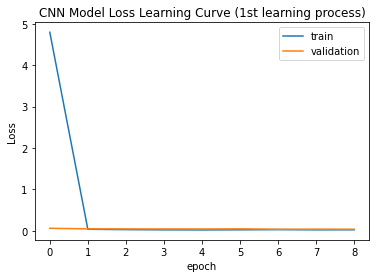

In [42]:
from matplotlib import pyplot as plt
plt.plot(conv_history['loss'])
plt.plot(conv_history['val_loss'])
plt.title('CNN Model Loss Learning Curve (1st learning process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [43]:
prediction_data = test_df.values.reshape(1, -1, CONV_WIDTH)  # Add batch dimension of 1
conv_predictions = best_cnn_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 0s 325ms/step


In [44]:
# reshape the conv_predictions array
# delete the first 5 values of the actual and test_dates arrays (corresponding to t = 0 to 4)

conv_predictions = conv_predictions.reshape(4375)
actual = actual[5:]
test_dates_cnn = test_dates[5:]


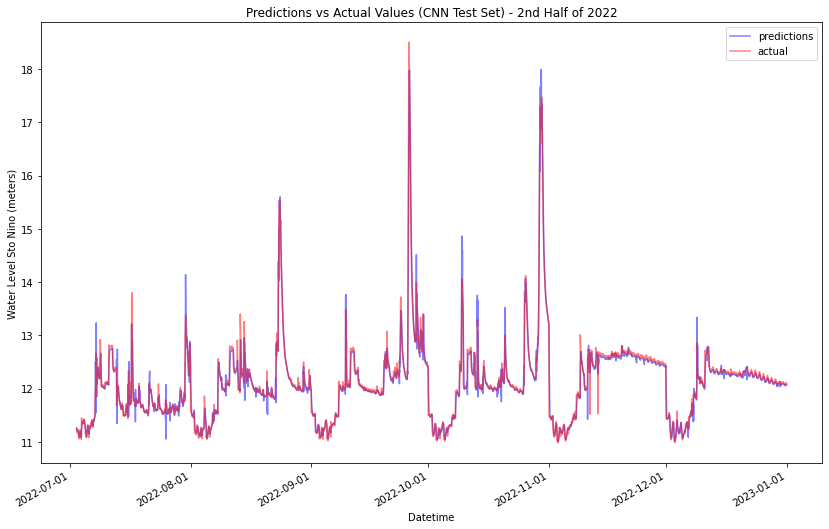

In [45]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module

plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates_cnn, conv_predictions, c = "blue", label = "predictions", alpha = 0.5)
plt.plot(test_dates_cnn, actual, c = "red", label = "actual", alpha = 0.5)
plt.title('Predictions vs Actual Values (CNN Test Set) - 2nd Half of 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

In [46]:
lstm_model_names = []
lstm_list_of_models = []

In [47]:
# LSTM / RNN


# Dense Neural Network
def lstm_model(no_of_layers, no_of_units, acti):
    model_name = f'LSTM_{no_of_layers}_{no_of_units}_{activation}'
    model = tf.keras.Sequential()
    model.add(layers.LSTM(64, return_sequences = True))
    for i in range(no_of_layers):
        model.add(layers.Dense(units = no_of_units, activation = acti))
    model.add(layers.Dense(units = 1))
    
    return model_name, model

for no_of_layers in range(2,6):
    for no_of_units in range(16,129,16):
        for activation in ['relu', 'tanh', 'sigmoid']:
            model_name, model = lstm_model(no_of_layers, no_of_units, activation)
            lstm_model_names.append(model_name)
            lstm_list_of_models.append(model)

In [48]:
lstm_val_performance = {}
lstm_history = {}
for count, model in enumerate(lstm_list_of_models):
    model_name = lstm_model_names[count]
    lstm_history[model_name] = compile_and_fit(model, wide_window)
    lstm_val_performance[model_name] = model.evaluate(wide_window.val, return_dict = True)
print(lstm_val_performance)

Epoch 1/20
274/274 [==============================] - 7s 7ms/step - loss: 19.4967 - mean_squared_error: 19.4967 - r_square: 0.2216 - NSE: -85.2402 - val_loss: 0.4785 - val_mean_squared_error: 0.4785 - val_r_square: 0.4343 - val_NSE: -1.2544
Epoch 2/20
274/274 [==============================] - 1s 5ms/step - loss: 0.1846 - mean_squared_error: 0.1846 - r_square: 0.4972 - NSE: 0.3429 - val_loss: 0.5019 - val_mean_squared_error: 0.5019 - val_r_square: 0.6692 - val_NSE: -1.3210
Epoch 3/20
274/274 [==============================] - 1s 5ms/step - loss: 0.1355 - mean_squared_error: 0.1355 - r_square: 0.6905 - NSE: 0.5240 - val_loss: 0.2652 - val_mean_squared_error: 0.2652 - val_r_square: 0.7959 - val_NSE: -0.1815
Epoch 4/20
274/274 [==============================] - 1s 5ms/step - loss: 0.0898 - mean_squared_error: 0.0898 - r_square: 0.8054 - NSE: 0.6863 - val_loss: 0.1343 - val_mean_squared_error: 0.1343 - val_r_square: 0.8527 - val_NSE: 0.3880
Epoch 5/20
274/274 [=============================

In [49]:
lstm_models = pd.DataFrame.from_dict(lstm_val_performance)
lstm_models = lstm_models.transpose()
lstm_models.sort_values(by = "loss")

,loss,mean_squared_error,r_square,NSE
LSTM_2_16_relu,0.019921,0.019921,0.930546,0.920964
LSTM_3_48_relu,0.021055,0.021055,0.927649,0.917172
LSTM_4_48_relu,0.021129,0.021129,0.923442,0.913844
LSTM_4_16_relu,0.021196,0.021196,0.928513,0.912386
LSTM_2_80_relu,0.022380,0.022380,0.921151,0.908719
...,...,...,...,...
LSTM_4_112_tanh,0.871216,0.871216,0.119182,-3.055633
LSTM_5_64_tanh,0.871862,0.871862,0.160654,-2.945308
LSTM_3_48_tanh,0.875119,0.875119,0.121239,-3.142478
LSTM_4_80_tanh,0.875671,0.875671,0.218200,-3.302193


In [50]:
# We evaluate the best model according to least validation loss
# Constructing the best model
best_lstm_index = lstm_model_names.index("LSTM_2_16_relu")
best_lstm_model = lstm_list_of_models[best_lstm_index]
performance['LSTM'] = best_lstm_model.evaluate(wide_window.test, verbose = 0, return_dict = True)

In [51]:
performance

{'Dense': {'loss': 0.015424405224621296,
  'mean_squared_error': 0.01542440615594387,
  'r_square': 0.9664893746376038,
  'NSE': 0.964451014995575},
 'CNN': {'loss': 0.038736868649721146,
  'mean_squared_error': 0.038736868649721146,
  'r_square': 0.9312072396278381,
  'NSE': 0.9179956912994385},
 'LSTM': {'loss': 0.020346440374851227,
  'mean_squared_error': 0.020346449688076973,
  'r_square': 0.9635158777236938,
  'NSE': 0.9582703113555908}}

In [52]:
# Test for Overfitting LSTM - 3 hidden layers 112 neurons ReLU
long_history = lstm_history["LSTM_2_16_relu"].history
long_history

{'loss': [19.496702194213867,
  0.18461917340755463,
  0.13554640114307404,
  0.08984461426734924,
  0.05829387530684471,
  0.04283702000975609,
  0.03473472595214844,
  0.029348935931921005,
  0.025231698527932167,
  0.02208247035741806,
  0.01970691792666912,
  0.017805233597755432,
  0.016749974340200424,
  0.015846051275730133,
  0.015119533985853195,
  0.014799955300986767,
  0.014884896576404572,
  0.014816824346780777,
  0.014398982748389244,
  0.01467000413686037],
 'mean_squared_error': [19.4966983795166,
  0.18461914360523224,
  0.13554638624191284,
  0.08984465897083282,
  0.05829388275742531,
  0.04283702373504639,
  0.034734733402729034,
  0.029348913580179214,
  0.025231720879673958,
  0.02208247408270836,
  0.019706906750798225,
  0.017805226147174835,
  0.016749979928135872,
  0.01584606245160103,
  0.015119528397917747,
  0.014799956232309341,
  0.014884896576404572,
  0.014816824346780777,
  0.014398982748389244,
  0.014669996686279774],
 'r_square': [0.22159193456172

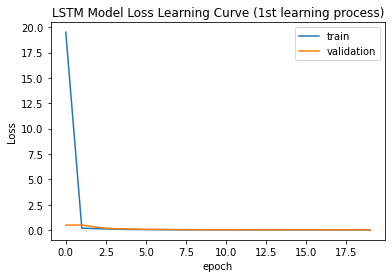

In [53]:
from matplotlib import pyplot as plt
plt.plot(long_history['loss'])
plt.plot(long_history['val_loss'])
plt.title('LSTM Model Loss Learning Curve (1st learning process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [196]:
prediction_data = test_df.values.reshape(1, -1, 6)  # Add batch dimension of 1
lstm_predictions = best_lstm_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 0s 221ms/step


In [197]:
print(lstm_predictions.shape)
lstm_predictions = lstm_predictions.reshape(4380)
print(actual.shape)
print(lstm_predictions.shape)


(1, 4380, 1)
(4380,)
(4380,)


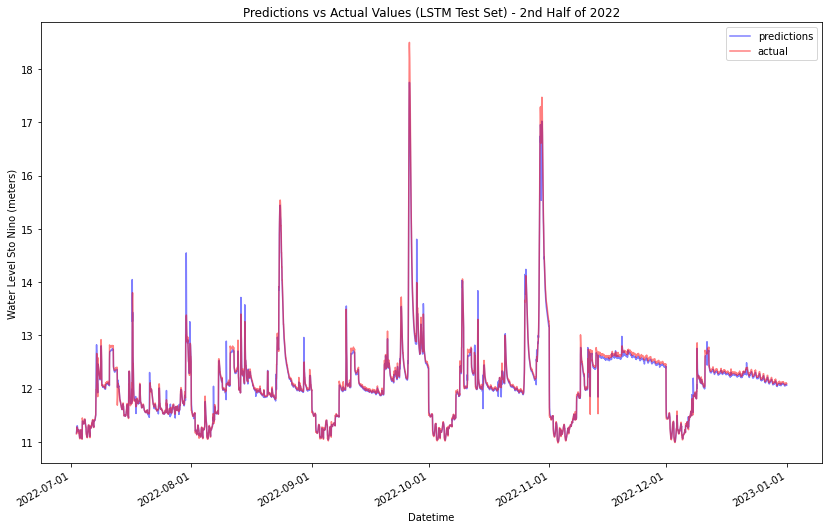

In [198]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module

plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates, lstm_predictions, c = "blue", label = "predictions", alpha = 0.5)
plt.plot(test_dates, actual, c = "red", label = "actual", alpha = 0.5)
plt.title('Predictions vs Actual Values (LSTM Test Set) - 2nd Half of 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

In [130]:
performance

{'Dense': {'loss': 0.015595957636833191,
  'mean_squared_error': 0.015595960430800915,
  'r_square': 0.9652843475341797,
  'NSE': 0.9625937938690186},
 'CNN': {'loss': 0.04144112765789032,
  'mean_squared_error': 0.04144112765789032,
  'r_square': 0.9361201524734497,
  'NSE': 0.9150425791740417},
 'LSTM': {'loss': 0.020989570766687393,
  'mean_squared_error': 0.020989570766687393,
  'r_square': 0.9630914330482483,
  'NSE': 0.957416832447052}}

In [131]:
pd.DataFrame.from_dict(performance).transpose()

,loss,mean_squared_error,r_square,NSE
Dense,0.015596,0.015596,0.965284,0.962594
CNN,0.041441,0.041441,0.936120,0.915043
LSTM,0.020990,0.020990,0.963091,0.957417


## Predictions (starting from t = 5)

In [132]:
test_dates_cnn


13145   2022-07-02 17:00:00
13146   2022-07-02 18:00:00
13147   2022-07-02 19:00:00
13148   2022-07-02 20:00:00
13149   2022-07-02 21:00:00
                ...        
17515   2022-12-31 19:00:00
17516   2022-12-31 20:00:00
17517   2022-12-31 21:00:00
17518   2022-12-31 22:00:00
17519   2022-12-31 23:00:00
Name: datetime, Length: 4375, dtype: datetime64[ns]

In [150]:
print(dense_predictions.shape)
dense_predictions = dense_predictions.reshape(4380)

print(conv_predictions.shape)
print(lstm_predictions.shape)
dense_predictions
dense_predictions = dense_predictions[5:]
lstm_predictions = lstm_predictions[5:]

(4380,)
(4375,)
(4380,)


In [160]:
actual = actual[5:]

In [161]:
print(actual.shape)
print(dense_predictions.shape)
print(conv_predictions.shape)
print(lstm_predictions.shape)
print(test_dates_cnn.shape)

(4375,)
(4375,)
(4375,)
(4375,)
(4375,)


In [164]:
data = {
    'datetime': test_dates_cnn.tolist(),
    'actual': actual.tolist(),
    'dense_predictions': dense_predictions.tolist(),
    'conv_predictions': conv_predictions.tolist(),
    'lstm_predictions': lstm_predictions.tolist()
}

predictions = pd.DataFrame(data)


In [172]:
predictions

,datetime,actual,dense_predictions,conv_predictions,lstm_predictions
0,2022-07-02 17:00:00,11.27,11.283282,11.303645,11.303248
1,2022-07-02 18:00:00,11.25,11.263721,11.312796,11.286794
2,2022-07-02 19:00:00,11.23,11.244158,11.315931,11.265916
3,2022-07-02 20:00:00,11.21,11.224596,11.311287,11.243935
4,2022-07-02 21:00:00,11.19,11.205033,11.298226,11.221756
...,...,...,...,...,...
4370,2022-12-31 19:00:00,12.11,12.104895,12.137940,12.079892
4371,2022-12-31 20:00:00,12.11,12.104895,12.143866,12.081876
4372,2022-12-31 21:00:00,12.11,12.104895,12.146369,12.082354
4373,2022-12-31 22:00:00,12.09,12.085333,12.142488,12.068946


In [171]:
predictions[predictions['actual'] == 18.5]

,datetime,actual,dense_predictions,conv_predictions,lstm_predictions
2048,2022-09-26 01:00:00,18.5,18.355021,17.259007,17.749748


In [174]:
predictions.to_csv('2H 2022 Predictions.csv')

## Multi-step models
- Uses the past 24 hours of data to predict the water level 24 hours into the future

In [11]:
OUT_STEPS = 24
multistep_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multistep_window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

In [12]:
multi_val_performance = {}
multi_performance = {}

In [26]:
# Autoregressive model : decomposes the prediction into individual time steps, you use the output for the next prediction
# Autoregressive LSTM/RNN

class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(6)
    def warmup(self, inputs):
        # inputs.shape => (batch, time, features)
        # x.shape => (batch, lstm_units)
        x, *state = self.lstm_rnn(inputs)
        # predictions.shape => (batch, features)
        prediction = self.dense(x)
        return prediction, state
    def call(self, inputs, training=None):
        # Use a TensorArray to capture dynamically unrolled outputs.
        predictions = []
        # Initialize the LSTM state.
        prediction, state = self.warmup(inputs)

        # Insert the first prediction.
        predictions.append(prediction)

        # Run the rest of the prediction steps.
        for n in range(1, self.out_steps):
            # Use the last prediction as input.
            x = prediction
            # Execute one lstm step.
            x, state = self.lstm_cell(x, states=state,
                                      training=training)
            # Convert the lstm output to a prediction.
            prediction = self.dense(x)
            # Add the prediction to the output.
            predictions.append(prediction)

        # predictions.shape => (time, batch, features)
        predictions = tf.stack(predictions)
        print(predictions)
        # predictions.shape => (batch, time, features)
        predictions = tf.transpose(predictions, [1, 0, 2])
        print(predictions)
        return predictions




In [27]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)
prediction, state = feedback_model.warmup(multistep_window.example[0])
prediction.shape

TensorShape([32, 6])

In [29]:
print('Output shape (batch, time, features): ', feedback_model(multistep_window.example[0]).shape)


tf.Tensor(
[[[ 2.2785015e-02  7.2452450e-01 -1.4670382e-01  1.7913489e-01
   -2.3302817e-01 -4.9600396e-01]
  [ 1.8957719e-02  7.2583413e-01 -1.4687771e-01  1.7303023e-01
   -2.1993989e-01 -4.9180916e-01]
  [ 1.8988647e-02  7.2746962e-01 -1.4737159e-01  1.7005938e-01
   -2.1689063e-01 -4.8956460e-01]
  ...
  [ 1.8492654e-02  7.2702599e-01 -1.4735542e-01  1.7085493e-01
   -2.1653658e-01 -4.9015865e-01]
  [ 6.0598254e-02  8.3693409e-01 -1.9498655e-01  2.2045489e-01
   -1.8354654e-01 -3.6748368e-01]
  [ 1.9333161e-02  7.2793132e-01 -1.4741069e-01  1.6946590e-01
   -2.1711409e-01 -4.8909146e-01]]

 [[ 1.4747146e-01  9.4724667e-01 -7.7041090e-02 -1.6060427e-02
   -3.9089823e-01 -2.3054981e-01]
  [ 1.4766568e-01  9.5272881e-01 -7.6650500e-02 -2.3853958e-02
   -3.7064463e-01 -2.3023608e-01]
  [ 1.4765070e-01  9.5238572e-01 -7.7786714e-02 -2.5156990e-02
   -3.6439618e-01 -2.3078576e-01]
  ...
  [ 1.4774494e-01  9.5314550e-01 -7.7567339e-02 -2.5386870e-02
   -3.6486769e-01 -2.3033762e-01]
  [ 1

In [35]:
history = compile_and_fit(feedback_model, multistep_window)

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multistep_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multistep_window.test, verbose=0, return_dict=True)

Epoch 1/20
Tensor("feed_back_4/stack:0", shape=(24, None, 6), dtype=float32)
Tensor("feed_back_4/transpose:0", shape=(None, 24, 6), dtype=float32)
Tensor("feed_back_4/stack:0", shape=(24, None, 6), dtype=float32)
Tensor("feed_back_4/transpose:0", shape=(None, 24, 6), dtype=float32)
273/273 [==============================] - ETA: 0s - loss: 2.9332 - mean_squared_error: 2.9332 - r_square: 0.0032 - NSE: 0.8761Tensor("feed_back_4/stack:0", shape=(24, None, 6), dtype=float32)
Tensor("feed_back_4/transpose:0", shape=(None, 24, 6), dtype=float32)
273/273 [==============================] - 8s 14ms/step - loss: 2.9332 - mean_squared_error: 2.9332 - r_square: 0.0032 - NSE: 0.8761 - val_loss: 1.9140 - val_mean_squared_error: 1.9140 - val_r_square: 0.0050 - val_NSE: 0.9053
Epoch 2/20
273/273 [==============================] - 3s 12ms/step - loss: 2.9304 - mean_squared_error: 2.9304 - r_square: 0.0047 - NSE: 0.8759 - val_loss: 1.9291 - val_mean_squared_error: 1.9291 - val_r_square: 0.0039 - val_NSE

In [39]:
multi_performance

{'AR LSTM': {'loss': 3.107299327850342,
  'mean_squared_error': 3.107300043106079,
  'r_square': 0.023979362100362778,
  'NSE': 0.8644867539405823}}

In [208]:
seed(80)
prediction_data = test_df.values.reshape(1, -1, 6)  # Add batch dimension of 1
ar_lstm_predictions = feedback_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 1s 554ms/step


In [209]:
ar_lstm_predictions

array([[[ 1.19732180e+01,  6.57539815e-04,  1.00518167e-02,
          1.13568828e-01, -5.24582900e-02,  1.01060450e-01],
        [ 1.19767151e+01,  2.92966887e-03,  1.36486292e-02,
          1.20037943e-01, -4.77453806e-02,  1.03212357e-01],
        [ 1.19757948e+01,  2.76881829e-03,  1.39584988e-02,
          1.21179774e-01, -4.55311127e-02,  1.04139030e-01],
        [ 1.19752131e+01,  2.92221457e-03,  1.40402615e-02,
          1.21678531e-01, -4.40188386e-02,  1.04942054e-01],
        [ 1.19750481e+01,  3.24713811e-03,  1.42026544e-02,
          1.22098431e-01, -4.28438373e-02,  1.05592430e-01],
        [ 1.19750986e+01,  3.60090658e-03,  1.44221932e-02,
          1.22479931e-01, -4.19048406e-02,  1.06091619e-01],
        [ 1.19752684e+01,  3.93282250e-03,  1.46647096e-02,
          1.22821122e-01, -4.11469974e-02,  1.06466472e-01],
        [ 1.19755030e+01,  4.23175842e-03,  1.49109960e-02,
          1.23123005e-01, -4.05274518e-02,  1.06747806e-01],
        [ 1.19757719e+01,  4.499